In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
from keras.losses import SparseCategoricalCrossentropy

In [12]:
X = pd.read_csv("./digit-recognizer/train.csv", sep=",")
Y = pd.read_csv("./digit-recognizer/test.csv", sep=",")

sample_submission = pd.read_csv("./digit-recognizer/sample_submission.csv", sep=",")

In [13]:
X.head(5)
# (42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y.head(5)
# (28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='label', ylabel='count'>

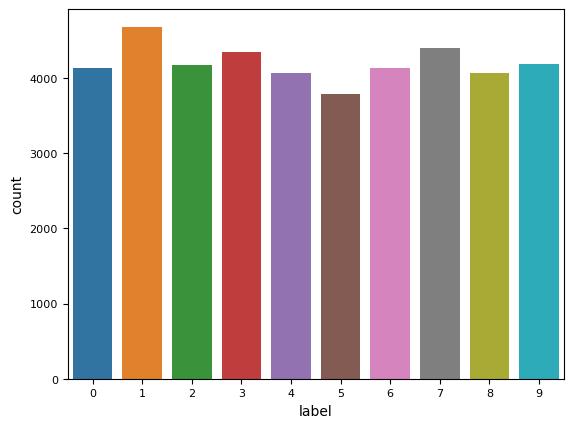

In [15]:
sns.countplot(x = 'label', data = X)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, X['label'], test_size=0.2, shuffle = True, stratify =X['label'],  random_state=42)

Y_train = LabelBinarizer().fit_transform(Y_train)
Y_test  = LabelBinarizer().fit_transform(Y_test)

X_train = X_train.drop(columns=['label'])
X_test  = X_test.drop(columns=['label'])

X_train = X_train / 255.0
X_test  = X_test / 255.0

X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)
Y = Y.values.reshape(-1,28,28,1)

print("Train X dataset shape: ", np.shape(X_train))
print("Train y dataset shape: ", np.shape(Y_train))

print("Test X dataset shape: ", np.shape(X_test))
print("Test y dataset shape: ", np.shape(Y_test))

Train X dataset shape:  (33600, 28, 28, 1)
Train y dataset shape:  (33600, 10)
Test X dataset shape:  (8400, 28, 28, 1)
Test y dataset shape:  (8400, 10)


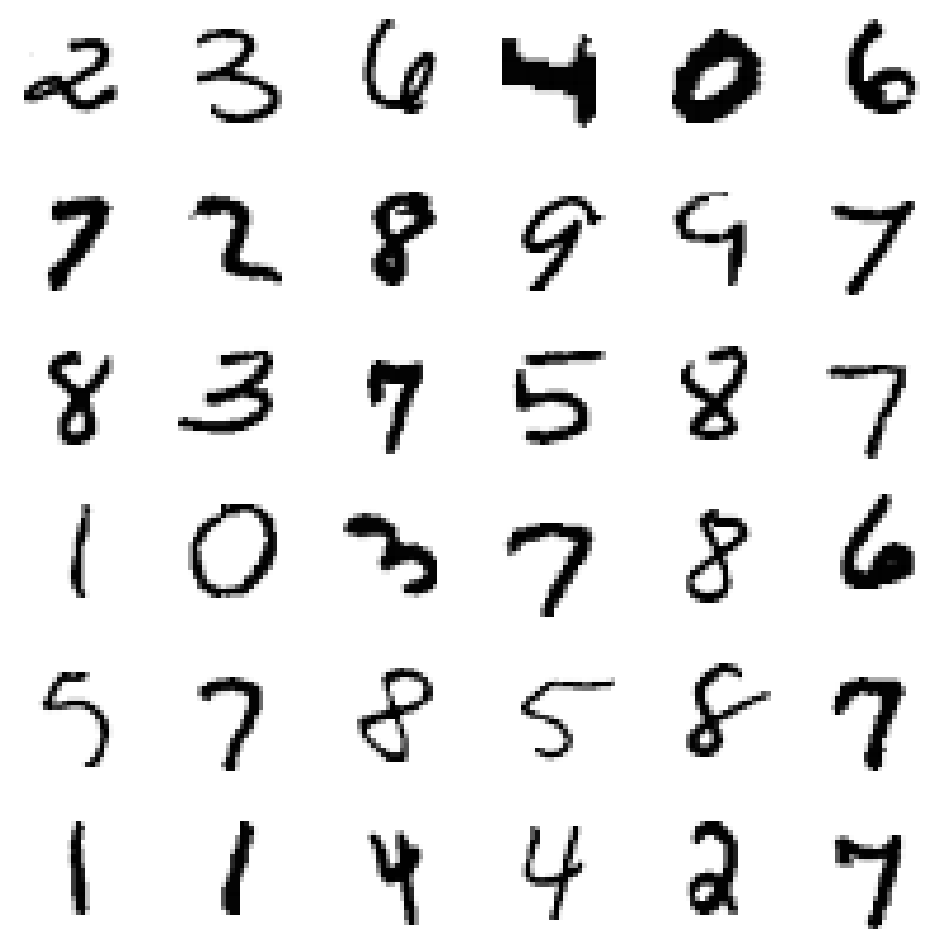

In [17]:
def plot_Image (X_train):
    plt.rc('font', size=10)
    plt.rc('legend', fontsize= 10)
    plt.rc('xtick', labelsize= 8)
    plt.rc('ytick', labelsize= 8)

    fig, ax = plt.subplots(6, 6, figsize = (12, 12))

    img_idx = 0
    for i in range(6):
        for j in range(6):
            ax[i][j].imshow(X_train[img_idx], cmap = 'Greys')
            ax[i][j].axis('off')
            img_idx += 1

    plt.show()
    
plot_Image(X_train)

In [46]:
# Define Sequential model with 2 layers
   
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

#callback=EarlyStopping(monitor='val_accuracy')

model.summary()

#loss=SparseCategoricalCrossentropy(from_logits=True)
#optim=keras.optimizers.Adam(learning_rate=0.1)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5, 
                                           min_lr=0.00001)

model.compile(loss='CategoricalCrossentropy', metrics=['accuracy'], optimizer = Adam())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_54 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_55 (Conv2D)          (None, 14, 14, 64)        36928     
                                                     

In [48]:
history = model.fit(X_train, Y_train, epochs=30, batch_size = 128, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/30
263/263 [==============================] - 43s 161ms/step - loss: 0.2852 - accuracy: 0.9065 - val_loss: 0.0670 - val_accuracy: 0.9793
Epoch 2/30
263/263 [==============================] - 56s 214ms/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.0538 - val_accuracy: 0.9838
Epoch 3/30
263/263 [==============================] - 55s 210ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0530 - val_accuracy: 0.9837
Epoch 4/30
263/263 [==============================] - 55s 209ms/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0390 - val_accuracy: 0.9885
Epoch 5/30
263/263 [==============================] - 55s 208ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0317 - val_accuracy: 0.9894
Epoch 6/30
263/263 [==============================] - 55s 208ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.0385 - val_accuracy: 0.9867
Epoch 7/30
263/263 [==============================] - 56s 212ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0298 - val_ac

In [49]:
Y = pd.read_csv("./digit-recognizer/test.csv", sep=",")
Y = Y.values.reshape(-1,28,28,1)

pred = model.predict(Y)

875/875 [==============================] - 11s 12ms/step


In [ ]:
plot_Image(Y)

In [50]:
df = pd.DataFrame(columns=["ImageId","Label"])

df.Label   = [_.argmax() for _ in pred]
df.ImageId = df.index+1
df.to_csv("./digit-recognizer/submission.csv", index = False)

df[:36]

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [ ]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

In [ ]:
plot_losses(history.history)